In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pystan
plt.rcParams['figure.figsize'] = [12,10]

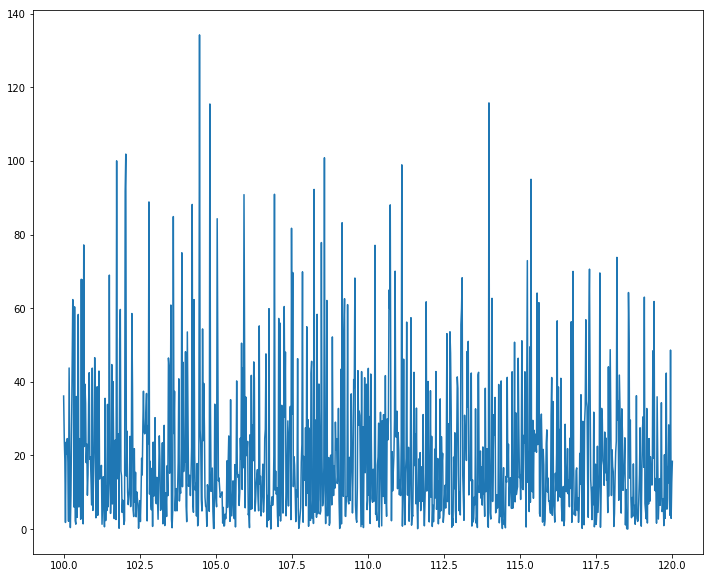

In [38]:
npts = 1000
f = np.linspace(100,120, npts)
data = 10.0 * np.random.chisquare(2, npts)
plt.plot(f, data)

In [34]:
code = '''
data {
    int<lower = 0> N;
    vector[N] f;
    vector[N] p;
}
parameters {
    real<lower = 0> mu;
}
model {
    p ~ gamma(1, 0.5 / mu );
}
'''
sm = pystan.StanModel(model_code=code, model_name='fit')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL fit_316087043f285e754013087ed30d7ef8 NOW.


/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Inference for Stan model: fit_316087043f285e754013087ed30d7ef8.
2 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     9.96    0.01   0.32   9.36   9.74   9.96  10.17  10.62    860    1.0
lp__  -3987    0.02   0.73  -3989  -3987  -3987  -3987  -3986    915    1.0

Samples were drawn using NUTS at Fri Feb 16 21:07:49 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


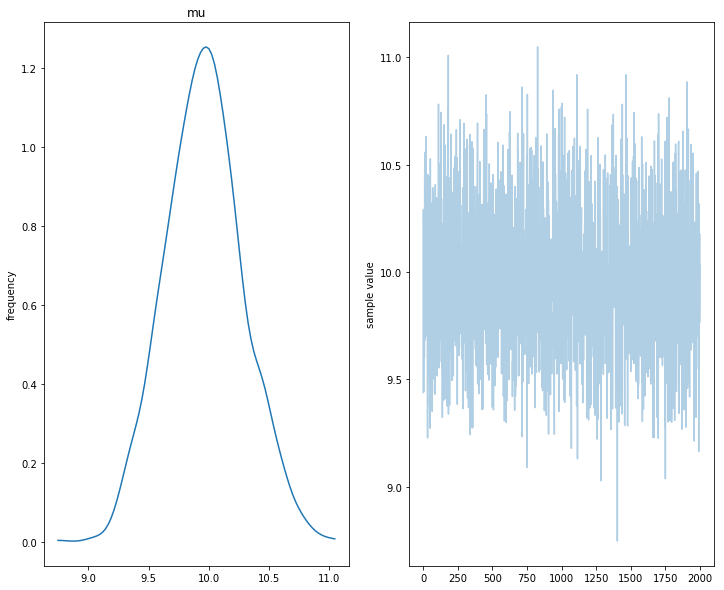

In [39]:
dat = {'N': len(data),
       'f': f,
      'p': data}
fit = sm.sampling(data=dat, iter=2000, chains=2)
fit.plot()
print(fit)